In [46]:
# Step 1 — Load & Inspect Data
import pandas as pd
from statsmodels.tsa.vector_ar.var_model import forecast

# load dataset
data = pd.read_csv('Receptor_western_NAmerica_ozone_obs_1994_2021_from900to300.csv')

# quick inspection
print(data.shape)
data.head()
data.info()

(539808, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539808 entries, 0 to 539807
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Pressure    539808 non-null  int64  
 1   Year        539808 non-null  int64  
 2   Month       539808 non-null  int64  
 3   Day         539808 non-null  int64  
 4   Hour        539808 non-null  int64  
 5   Minute      539808 non-null  int64  
 6   Site        539808 non-null  int64  
 7   Latitude    539808 non-null  float64
 8   Longitude   539808 non-null  float64
 9   Ozone_ppbv  539808 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 41.2 MB


In [47]:
# step 2- create Proper Datetime column
data["Datetime"] = pd.to_datetime(
    data[["Year", "Month", "Day", "Hour", "Minute"]]
)

data = data.sort_values("Datetime")

In [48]:
# Step 3 — Missing & Data Quality Check
data.isnull().sum()

# ozone distribution
data = data[data["Ozone_ppbv"]>= 0]


<Axes: title={'center': 'Monthly Ozone Ppbv'}, xlabel='Datetime'>

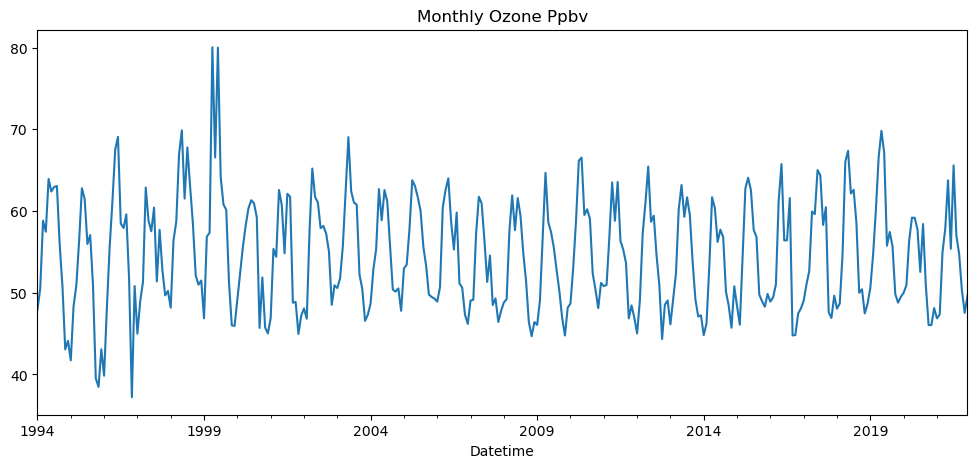

In [49]:
# step 4 - Basic Trend Exploration (Ozone Over time)
monthly_avg = data.resample("MS", on="Datetime")["Ozone_ppbv"].mean()

monthly_avg.plot(title="Monthly Ozone Ppbv", figsize=(12, 5))




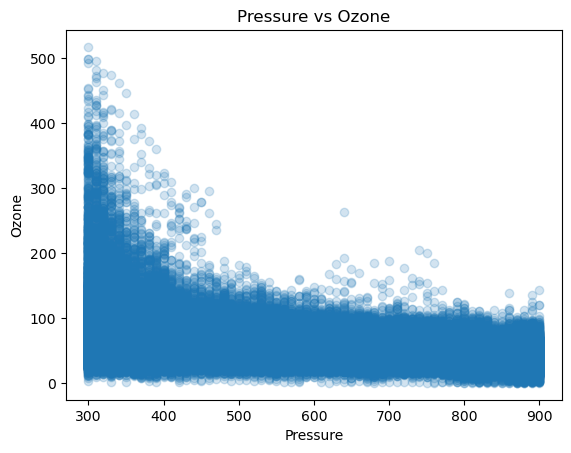

In [50]:
# Step 5 — Pressure vs Ozone Relationship
import matplotlib.pyplot as plt

plt.scatter(data["Pressure"], data["Ozone_ppbv"], alpha=0.2)
plt.xlabel("Pressure")
plt.ylabel("Ozone")
plt.title("Pressure vs Ozone")
plt.show()

<Axes: xlabel='Site'>

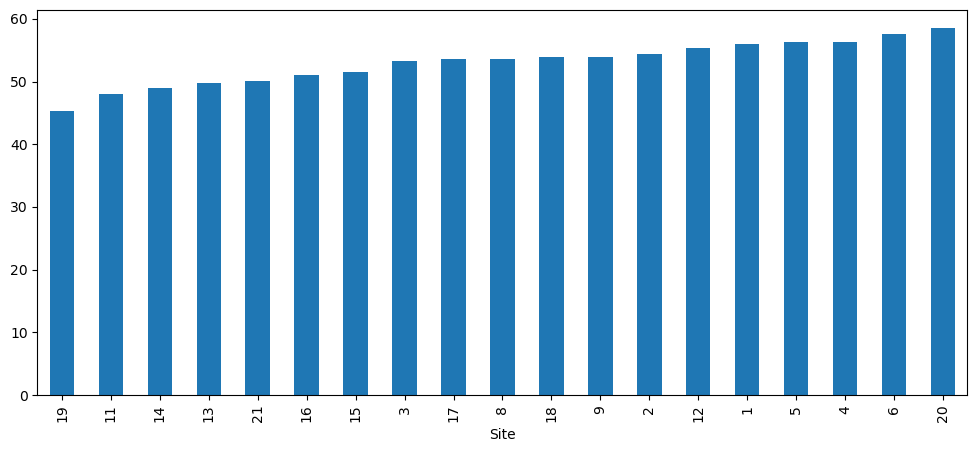

In [51]:
# Step 6 — Site Comparison
site_avg = data.groupby("Site")["Ozone_ppbv"].mean()
site_avg.sort_values().plot(kind="bar", figsize=(12, 5))

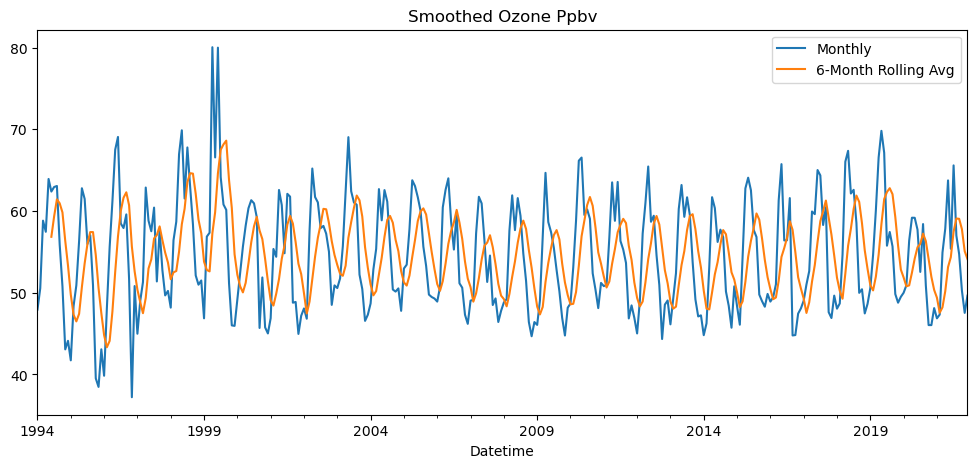

In [56]:
# Step 7 — Rolling Trend (Advanced)
rolling = monthly_avg.rolling(6).mean()
plt.figure(figsize=(12,5))
monthly_avg.plot(label="Monthly")
rolling.plot(label="6-Month Rolling Avg")
plt.legend()
plt.title("Smoothed Ozone Ppbv")
plt.show()



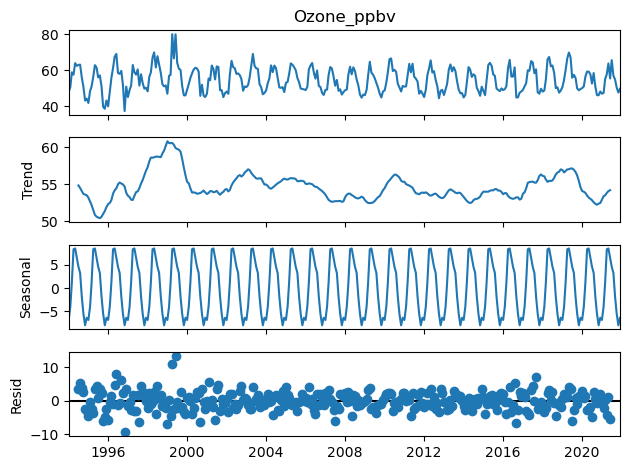

In [53]:
# Step 8 — Decompose Trend + Seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(
    monthly_avg,
    model="additive",
    period=12
)

decomposition.plot()
plt.show()

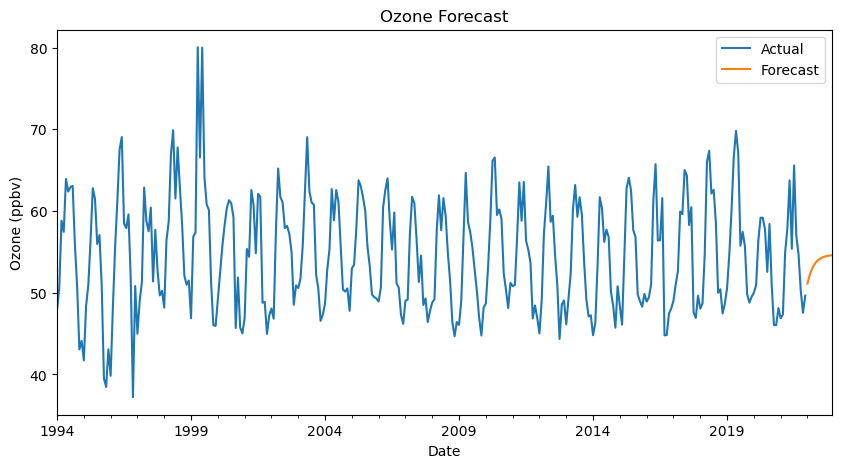

In [54]:
# Step 9 — Forecasting Model (ARIMA)
from statsmodels.tsa.arima.model import ARIMA

# ensure no missing values
monthly_avg = monthly_avg.dropna()
model = ARIMA(
    monthly_avg,
    order=(2,1,2),
    enforce_stationarity=False,
    enforce_invertibility=False
)

model_fit = model.fit()   # ← missing line

forecast = model_fit.forecast(steps=12)
# plot
plt.figure(figsize=(10,5))
monthly_avg.plot(label="Actual")
forecast.plot(label="Forecast")

plt.legend()
plt.title("Ozone Forecast")
plt.xlabel("Date")
plt.ylabel("Ozone (ppbv)")
plt.show()


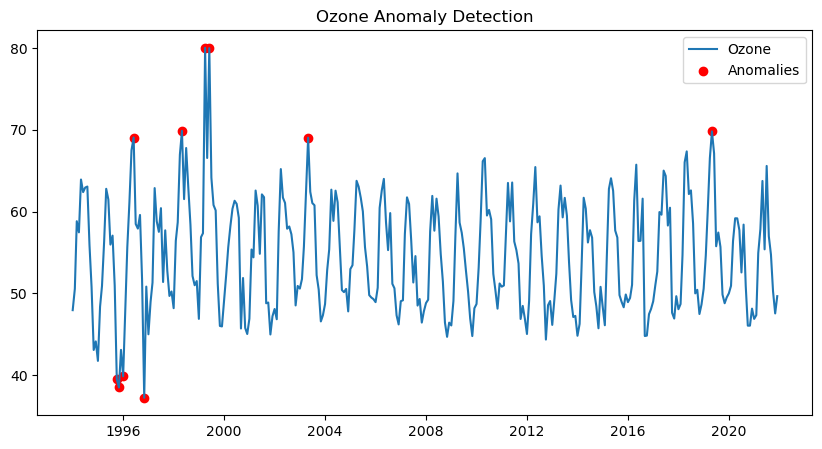

In [55]:
# Step 10 — Anomaly Detection (Advanced Analyst Skill)
mean = monthly_avg.mean()
std = monthly_avg.std()

threshold_upper = mean + 2*std
threshold_lower = mean - 2*std

anomalies = monthly_avg[
    (monthly_avg > threshold_upper) |
    (monthly_avg < threshold_lower)
]

plt.figure(figsize=(10,5))
plt.plot(monthly_avg, label="Ozone")
plt.scatter(anomalies.index, anomalies, color="red", label="Anomalies")
plt.legend()
plt.title("Ozone Anomaly Detection")
plt.show()
